In [473]:
'''import applicable modules and set plot style'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import math
# import datetime
# %matplotlib inline
sns.set_style('darkgrid')

In [474]:
'''import the data'''

circuits_df = pd.read_csv('circuits.csv')
constructors_df = pd.read_csv('constructors.csv')
drivers_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')
status_df = pd.read_csv('status.csv')

In [475]:
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [476]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [477]:
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [478]:
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [479]:
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [480]:
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [481]:
'''merge the tables into one dataframe'''

merge1 = results_df.merge(constructors_df, on = 'constructorId', suffixes = (None,'_co'))
merge2 = merge1.merge(drivers_df, on = 'driverId', suffixes = (None,'_d'))
merge3 = merge2.merge(races_df, on = 'raceId', suffixes = (None,'_r'))
merge4 = merge3.merge(status_df, on = 'statusId', suffixes = (None,'_s'))
df = merge4.merge(circuits_df, on = 'circuitId', suffixes = (None,'_ci'))
pd.set_option('display.max_columns', None)
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name,nationality,url,driverRef,number_d,code,forename,surname,dob,nationality_d,url_d,year,round,circuitId,name_r,date,time_r,url_r,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,status,circuitRef,name_ci,location,country,lat,lng,alt,url_ci
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [482]:
df.tail()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name,nationality,url,driverRef,number_d,code,forename,surname,dob,nationality_d,url_d,year,round,circuitId,name_r,date,time_r,url_r,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,status,circuitRef,name_ci,location,country,lat,lng,alt,url_ci
25835,20012,832,741,154,34,13,8,8,8,0.0,63,\N,\N,\N,\N,\N,\N,17,lago,Talbot-Lago,French,http://en.wikipedia.org/wiki/Talbot-Lago,etancelin,\N,\N,Philippe,Étancelin,1896-12-28,French,http://en.wikipedia.org/wiki/Philippe_%C3%89ta...,1951,8,67,Spanish Grand Prix,1951-10-28,\N,http://en.wikipedia.org/wiki/1951_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,+7 Laps,pedralbes,Circuit de Pedralbes,Barcelona,Spain,41.3903,2.11667,85,http://en.wikipedia.org/wiki/Pedralbes_Circuit
25836,20015,832,633,6,4,5,\N,R,11,0.0,48,\N,\N,\N,\N,\N,\N,80,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Scuderia_Ferrari,villoresi,\N,\N,Luigi,Villoresi,1909-05-16,Italian,http://en.wikipedia.org/wiki/Luigi_Villoresi,1951,8,67,Spanish Grand Prix,1951-10-28,\N,http://en.wikipedia.org/wiki/1951_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Ignition,pedralbes,Circuit de Pedralbes,Barcelona,Spain,41.3903,2.11667,85,http://en.wikipedia.org/wiki/Pedralbes_Circuit
25837,20022,832,589,154,30,12,\N,R,18,0.0,4,\N,\N,\N,\N,\N,\N,80,lago,Talbot-Lago,French,http://en.wikipedia.org/wiki/Talbot-Lago,chiron,\N,\N,Louis,Chiron,1899-08-03,Monegasque,http://en.wikipedia.org/wiki/Louis_Chiron,1951,8,67,Spanish Grand Prix,1951-10-28,\N,http://en.wikipedia.org/wiki/1951_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Ignition,pedralbes,Circuit de Pedralbes,Barcelona,Spain,41.3903,2.11667,85,http://en.wikipedia.org/wiki/Pedralbes_Circuit
25838,19409,807,475,105,8,6,\N,R,16,0.0,20,\N,\N,\N,\N,\N,\N,94,maserati,Maserati,Italian,http://en.wikipedia.org/wiki/Maserati,moss,\N,\N,Stirling,Moss,1929-09-17,British,http://en.wikipedia.org/wiki/Stirling_Moss,1954,9,67,Spanish Grand Prix,1954-10-24,\N,http://en.wikipedia.org/wiki/1954_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Oil pump,pedralbes,Circuit de Pedralbes,Barcelona,Spain,41.3903,2.11667,85,http://en.wikipedia.org/wiki/Pedralbes_Circuit
25839,19405,807,478,131,6,9,\N,R,12,0.0,50,\N,\N,\N,\N,\N,\N,98,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,herrmann,\N,\N,Hans,Herrmann,1928-02-23,German,http://en.wikipedia.org/wiki/Hans_Herrmann,1954,9,67,Spanish Grand Prix,1954-10-24,\N,http://en.wikipedia.org/wiki/1954_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Injection,pedralbes,Circuit de Pedralbes,Barcelona,Spain,41.3903,2.11667,85,http://en.wikipedia.org/wiki/Pedralbes_Circuit


In [483]:
df.sample(5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,name,nationality,url,driverRef,number_d,code,forename,surname,dob,nationality_d,url_d,year,round,circuitId,name_r,date,time_r,url_r,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,status,circuitRef,name_ci,location,country,lat,lng,alt,url_ci
1672,21810,884,821,15,12,19,11,11,11,0.0,65,\N,\N,56,1,1:26.217,194.370,11,sauber,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber,gutierrez,21,GUT,Esteban,Gutiérrez,1991-08-05,Mexican,http://en.wikipedia.org/wiki/Esteban_Guti%C3%A...,2013,5,4,Spanish Grand Prix,2013-05-12,12:00:00,http://en.wikipedia.org/wiki/2013_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,+1 Lap,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
5570,3461,182,49,17,8,5,4,4,4,3.0,60,+27.789,5577933,\N,\N,\N,\N,1,jordan,Jordan,Irish,http://en.wikipedia.org/wiki/Jordan_Grand_Prix,frentzen,\N,\N,Heinz-Harald,Frentzen,1967-05-18,German,http://en.wikipedia.org/wiki/Heinz-Harald_Fren...,1999,8,9,British Grand Prix,1999-07-11,\N,http://en.wikipedia.org/wiki/1999_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
1641,7643,5,10,7,10,6,10,10,10,0.0,65,\N,\N,44,12,1:24.134,199.182,11,toyota,Toyota,Japanese,http://en.wikipedia.org/wiki/Toyota_Racing,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,+1 Lap,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
12521,1917,110,4,4,8,10,3,3,3,6.0,54,+6.348,5484548,\N,\N,\N,\N,1,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2003,3,18,Brazilian Grand Prix,2003-04-06,\N,http://en.wikipedia.org/wiki/2003_Brazilian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Finished,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.69970,785,http://en.wikipedia.org/wiki/Aut%C3%B3dromo_Jo...
7033,9189,395,169,39,14,25,\N,R,21,0.0,10,\N,\N,\N,\N,\N,\N,5,ags,AGS,French,http://en.wikipedia.org/wiki/Automobiles_Gonfa...,fabre,\N,\N,Pascal,Fabre,1960-01-09,French,http://en.wikipedia.org/wiki/Pascal_Fabre,1987,8,10,German Grand Prix,1987-07-26,\N,http://en.wikipedia.org/wiki/1987_German_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,Engine,hockenheimring,Hockenheimring,Hockenheim,Germany,49.3278,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [484]:
# drop unwanted columns
cols_to_drop = ['time', 'url', 'url_d', 'url_r', 'url_ci', 'fp1_date', 'fp1_time', 
                'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'time_r',
                'quali_date', 'quali_time', 'sprint_date', 'sprint_time',
                'number','number_d']
df.drop(cols_to_drop, axis = 1, inplace=True)

In [485]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'milliseconds',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId',
       'constructorRef', 'name', 'nationality', 'driverRef', 'code',
       'forename', 'surname', 'dob', 'nationality_d', 'year', 'round',
       'circuitId', 'name_r', 'date', 'status', 'circuitRef', 'name_ci',
       'location', 'country', 'lat', 'lng', 'alt'],
      dtype='object')

In [486]:
# rename columns to meaningful names
df.rename({'name':'con_name', 
           'nationality':'con_nationality', 
           'name_r':'race_name', 
           'name_ci':'circuit_name',
           'nationality_d':'driver_nationality'}, axis=1, inplace=True)

In [487]:
# replace '\N' with NaN
df.replace('\\N',None, inplace = True)

In [488]:
df.dropna(subset = ['fastestLapTime', 'fastestLapSpeed'], inplace = True)

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7379 entries, 0 to 19985
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   resultId            7379 non-null   int64  
 1   raceId              7379 non-null   int64  
 2   driverId            7379 non-null   int64  
 3   constructorId       7379 non-null   int64  
 4   grid                7379 non-null   int64  
 5   position            6220 non-null   object 
 6   positionText        7379 non-null   object 
 7   positionOrder       7379 non-null   int64  
 8   points              7379 non-null   float64
 9   laps                7379 non-null   int64  
 10  milliseconds        3683 non-null   object 
 11  fastestLap          7379 non-null   object 
 12  rank                7379 non-null   object 
 13  fastestLapTime      7379 non-null   object 
 14  fastestLapSpeed     7379 non-null   object 
 15  statusId            7379 non-null   int64  
 16  const

In [490]:
import datetime

def lap_time_converter(s):
    '''convert time data string into format that pd.to__timedelta will accept
    
    Parameters:
    -----------
    s : string
    
    Returns:
    string with format HH:MM:SS:fff
    '''
    formats = ['%S.%f', '%M:%S.%f', '%H:%M:%S.%f']
    for format in formats:
        try:
            s = datetime.datetime.strptime(s, format)
            break
        except ValueError:
            continue
    return s.strftime('%H:%M:%S.%f')

In [491]:
# convert lap speed to numeric
df['fastestLapSpeed'] = pd.to_numeric(df['fastestLapSpeed'])

# apply lap time converter function to fastest lap time (reformat)
df['fastestLapTime'] = df['fastestLapTime'].map(lambda x: lap_time_converter(x))

In [492]:
# create new column
df['fastestLap_seconds'] = df['fastestLapTime'].map(lambda x: pd.to_timedelta(x).total_seconds())

In [493]:
df[['fastestLapSpeed']].describe().T

,count,mean,std,min,25%,50%,75%,max
fastestLapSpeed,7379.0,203.089214,21.356876,89.54,192.776,204.291,216.1595,257.32


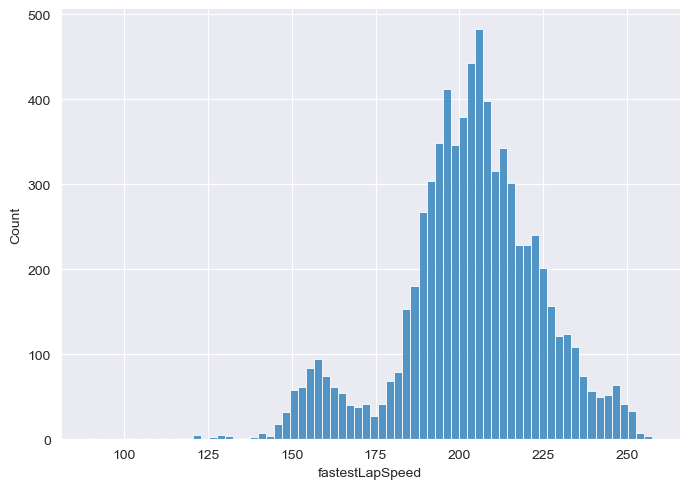

In [494]:
# initial histogram of data
fig = sns.displot(data=df, x='fastestLapSpeed', aspect=1.4)
# fig.set_axis_labels('Lap Time (Seconds)')
# fig.savefig('initial_hist.png')
plt.show()

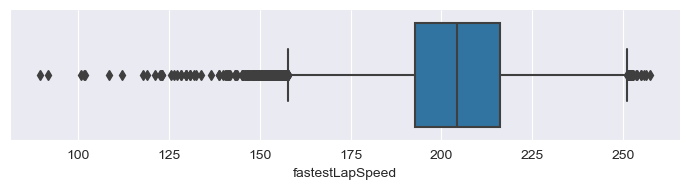

In [495]:
# boxplot of data to illustrate outliers
fig = sns.catplot(data=df, x='fastestLapSpeed', kind='box', height=2, aspect=3.5)
# fig.set_axis_labels('Lap Time (Seconds)')
# fig.savefig('initial_box.jpg')
plt.show()

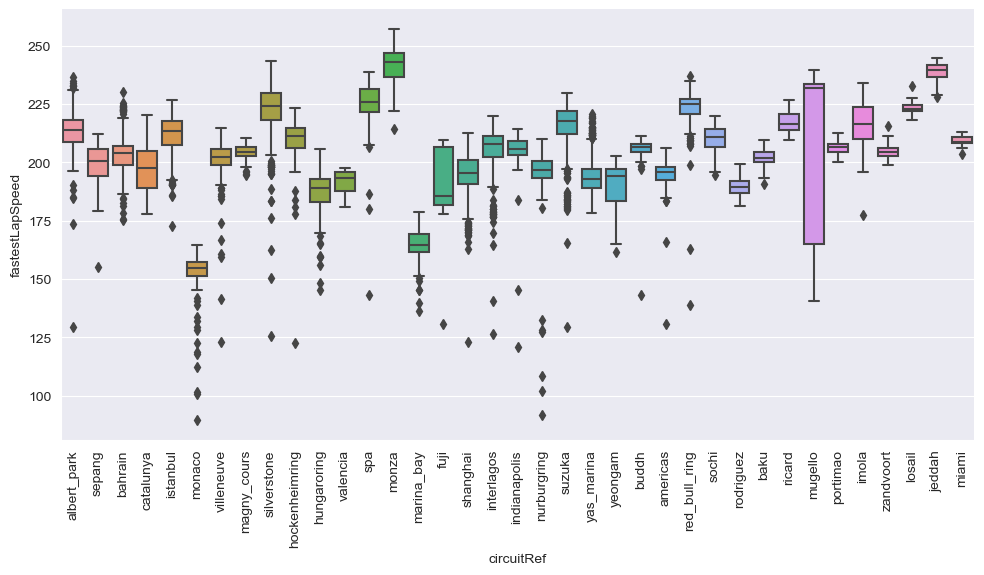

In [496]:
fig = sns.catplot(data=df, y='fastestLapSpeed', kind='box', x='circuitRef', aspect=2)
fig.set_xticklabels(rotation=90)
plt.show()

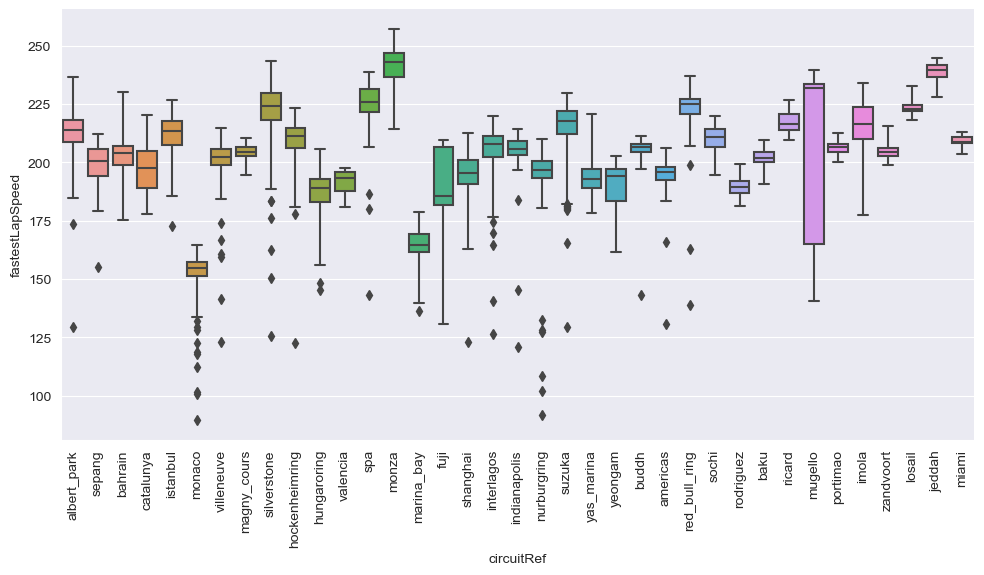

In [497]:
fig = sns.catplot(data=df, y='fastestLapSpeed', kind='box', x='circuitRef', aspect=2, whis=3)
fig.set_xticklabels(rotation=90)
plt.show()

In [498]:
# create function to identify outliers
def is_outlier(s):
    """Takes a numeric Series and returns a boolean Series where outliers are True
    
    Parameters
    ----------
    s : Series, numeric
    
    Returns
    -------
    Series
        a boolean series where outliers have a True value
    
    """
    q1 = s.quantile(.25)
    q3 = s.quantile(.75)
    iqr = q3 - q1
    
    lower_bound = q1 - iqr*3
    upper_bound = q3 + iqr*3
    
    return ~s.between(lower_bound, upper_bound)

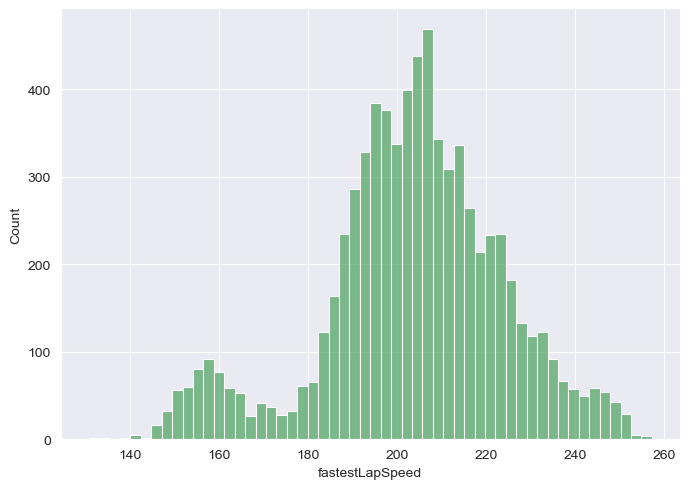

In [499]:
# remove overall outliers
# df = df[~df['fastestLapSpeed'].transform(is_outlier)]

# remove extreme outliers by circuit
df = df[~df.groupby('circuitId')['fastestLapSpeed'].apply(is_outlier)]

# replot histogram 
fig = sns.displot(data=df, x='fastestLapSpeed', color='#55a868', aspect=1.4)
# fig.set_axis_labels('Lap Time (Seconds)', 'Count')
# fig.savefig('updated_hist.png')
# fig.ax.set_xticks(range(50,140,5), labels=range(50,140,5), rotation=45)
plt.show()

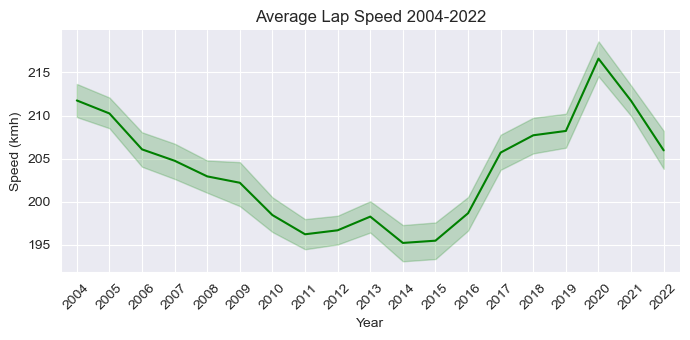

In [513]:
# line plots with average lap seconds
fig = sns.relplot(data=df, x='year', y='fastestLapSpeed', kind='line', color='green', height=3.5, aspect=2)
# fig.ax.set_xticks(range(2004,2023), range(2004,2023), rotation=45)
fig.set_axis_labels('Year', 'Speed (kmh)')
fig.set(title='Average Lap Speed 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
fig.savefig('lap_speed_line.png')
plt.show()

In [505]:
# get dataframe with average lap time by year
df_diff = df.groupby('year', as_index = False)['fastestLapSpeed'].mean()

# add column to calculate the change year over year
df_diff['change'] = df_diff['fastestLapSpeed'].diff()
df_diff

,year,fastestLapSpeed,change
0,2004,211.743830,NaN
1,2005,210.237164,-1.506666
2,2006,206.075942,-4.161222
3,2007,204.756198,-1.319744
4,2008,202.945055,-1.811143
5,2009,202.206432,-0.738623
6,2010,198.459757,-3.746675
7,2011,196.238251,-2.221506
8,2012,196.698504,0.460253
9,2013,198.284154,1.585649


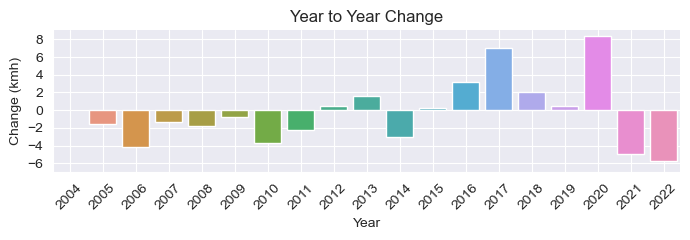

In [512]:
# plot change year over year
fig = sns.catplot(data=df_diff, x='year', y='change', kind='bar', height=2.5, aspect=2.8)
fig.set(title='Year to Year Change')
fig.set_axis_labels('Year', 'Change (kmh)')
fig.set_xticklabels(rotation=45)
fig.ax.grid(color='white')
fig.ax.set_ylim(-7,9)
fig.ax.set_yticks(range(-6,9,2))
fig.tight_layout()
fig.savefig('lap_speed_delta.png')
plt.show()

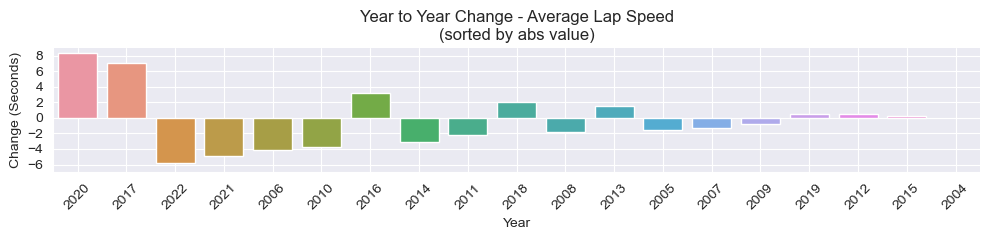

In [522]:
# plot change year over year, sorted by abs value
fig = sns.catplot(data=df_diff, x='year', y='change', kind='bar', height=2.5, aspect=4, order=df_diff.sort_values(by='change', key=abs, ascending=False)['year'])
fig.set(title='Year to Year Change - Average Lap Speed\n(sorted by abs value)')
fig.set_axis_labels('Year', 'Change (Seconds)')
fig.set_xticklabels(rotation=45)
fig.ax.grid(color='white')
fig.ax.set_ylim(-7,9)
fig.ax.set_yticks(range(-6,9,2))
fig.tight_layout()
fig.savefig('lap_time_delta_sorted.png')
plt.show()

## Largest delta by year
1. 2022: +3.935 seconds
2. 2009: +3.879 seconds
3. 2020: -3.637 seconds
4. 2017: -2.772 seconds

### 2022 - Aerodynamic Regulations Overhaul

Presentation will include a brief description of the change

### 2009 - Aerodynamic Regulations Overhaul

Presentation will include a brief description of the change

### 2020 - COVID
Data is skewed due to cancellations.
Fewer observations this year

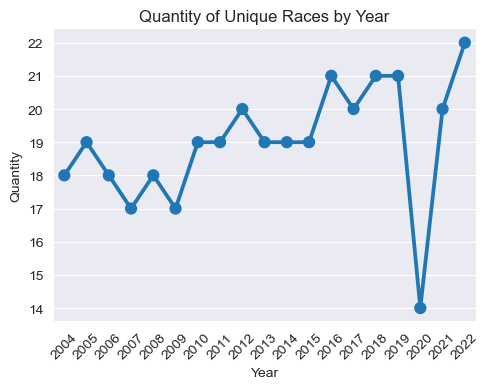

In [536]:
temp = df.groupby(['year'], as_index=False).nunique()
fig = sns.catplot(data=temp, x='year', y='circuitId', kind='point', height = 4, aspect = 1.25)
fig.set_xticklabels(rotation=45)
fig.set_axis_labels('Year', 'Quantity')
fig.set(title='Quantity of Unique Races by Year')
fig.tight_layout()
fig.savefig('races_per_year.png')
plt.show()

# Does this tell the whole story?
Closer look at the most-used circuits from 2004-2022

In [304]:
# circuits with the most races
df.groupby(['circuitRef']).nunique().sort_values(by='raceId', ascending=False)[['raceId']].head(10)

,raceId
circuitRef,
silverstone,20
hungaroring,19
bahrain,19
catalunya,19
monza,19
monaco,18
interlagos,18
spa,17
albert_park,17


## Silverstone

In [305]:
# add a category column to to the dataframe for ease of plotting after concat
df['category'] = 'All'

In [306]:
# create subset data frame with silverstone data
df_silverstone = df.loc[df.circuitRef=='silverstone']
# populate category column with 'Silverstone'
df_silverstone.loc[df.circuitRef=='silverstone', 'category'] = 'Silverstone'

# concat with full dataframe
df_silverstone = pd.concat([df,df_silverstone], ignore_index=True)
df_silverstone

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,con_name,con_nationality,driverRef,code,forename,surname,dob,driver_nationality,year,round,circuitId,race_name,date,status,circuitRef,circuit_name,location,country,lat,lng,alt,fastestLap_seconds,category
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,00:01:27.452000,218.300,1,mclaren,McLaren,British,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.452,All
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,00:01:27.418000,218.385,1,mclaren,McLaren,British,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.418,All
2,4,18,4,4,11,4,4,4,5.0,58,5707797,58,7,00:01:28.603000,215.464,1,renault,Renault,French,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.603,All
3,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,00:01:27.739000,217.586,1,bmw_sauber,BMW Sauber,German,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.739,All
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,00:01:28.090000,216.719,1,williams,Williams,British,rosberg,ROS,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.090,All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,915,60,18,11,19,None,R,19,0.0,8,None,8,17,00:01:25.207000,217.207,44,honda,Honda,Japanese,button,BUT,Jenson,Button,1980-01-19,British,2006,8,9,British Grand Prix,2006-06-11,Oil leak,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,85.207,Silverstone
7705,25600,1083,839,214,15,None,R,15,0.0,37,None,37,14,00:01:33.537000,226.729,48,alpine,Alpine F1 Team,French,ocon,OCO,Esteban,Ocon,1996-09-17,French,2022,10,9,British Grand Prix,2022-07-03,Fuel pump,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,93.537,Silverstone
7706,20987,849,18,1,5,None,R,20,0.0,39,None,31,10,00:01:36.982000,218.675,61,mclaren,McLaren,British,button,BUT,Jenson,Button,1980-01-19,British,2011,9,9,British Grand Prix,2011-07-10,Wheel nut,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,96.982,Silverstone
7707,25601,1083,842,213,11,None,R,16,0.0,26,None,18,16,00:01:34.614000,224.148,130,alphatauri,AlphaTauri,Italian,gasly,GAS,Pierre,Gasly,1996-02-07,French,2022,10,9,British Grand Prix,2022-07-03,Collision damage,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,94.614,Silverstone


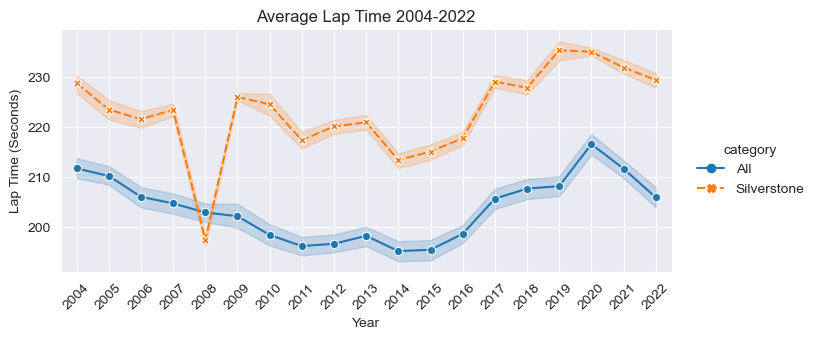

In [307]:
# line plots overlayed all with silverstone
fig = sns.relplot(data=df_silverstone, x='year', y='fastestLapSpeed', kind='line', hue='category', height=3.5, aspect=2, markers=True, style='category')
fig.set_axis_labels('Year', 'Lap Time (Seconds)')
fig.set(title='Average Lap Time 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
# fig.savefig
plt.show()

## Hungaroring

In [308]:
# create subset data frame with hungary data
df_hungaroring = df.loc[df.circuitRef=='hungaroring']
# populate category column with 'Silverstone'
df_hungaroring.loc[df.circuitRef=='hungaroring', 'category'] = 'Hungaroring'

# concat with full dataframe
df_hungaroring = pd.concat([df,df_hungaroring], ignore_index=True)
df_hungaroring

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,con_name,con_nationality,driverRef,code,forename,surname,dob,driver_nationality,year,round,circuitId,race_name,date,status,circuitRef,circuit_name,location,country,lat,lng,alt,fastestLap_seconds,category
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,00:01:27.452000,218.300,1,mclaren,McLaren,British,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.452,All
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,00:01:27.418000,218.385,1,mclaren,McLaren,British,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.418,All
2,4,18,4,4,11,4,4,4,5.0,58,5707797,58,7,00:01:28.603000,215.464,1,renault,Renault,French,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,88.603,All
3,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,00:01:27.739000,217.586,1,bmw_sauber,BMW Sauber,German,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.739,All
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,00:01:28.090000,216.719,1,williams,Williams,British,rosberg,ROS,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,88.090,All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7695,22733,936,8,6,5,None,R,18,0.0,55,None,24,7,00:01:26.954000,181.378,131,ferrari,Ferrari,Italian,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish,2015,10,11,Hungarian Grand Prix,2015-07-26,Power Unit,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,86.954,Hungaroring
7696,25665,1086,822,51,8,20,20,20,0.0,65,None,60,19,00:01:24.002000,187.752,131,alfa,Alfa Romeo,Swiss,bottas,BOT,Valtteri,Bottas,1989-08-28,Finnish,2022,13,11,Hungarian Grand Prix,2022-07-31,Power Unit,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,84.002,Hungaroring
7697,24021,1000,830,9,7,None,R,19,0.0,5,None,5,19,00:01:23.985000,187.790,75,red_bull,Red Bull,Austrian,max_verstappen,VER,Max,Verstappen,1997-09-30,Dutch,2018,12,11,Hungarian Grand Prix,2018-07-29,Power loss,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,83.985,Hungaroring
7698,1390,83,35,15,15,None,R,16,0.0,56,None,23,14,00:01:23.118000,189.749,56,sauber,Sauber,Swiss,villeneuve,VIL,Jacques,Villeneuve,1971-04-09,Canadian,2005,13,11,Hungarian Grand Prix,2005-07-31,Engine fire,hungaroring,Hungaroring,Budapest,Hungary,47.5789,19.2486,264,83.118,Hungaroring


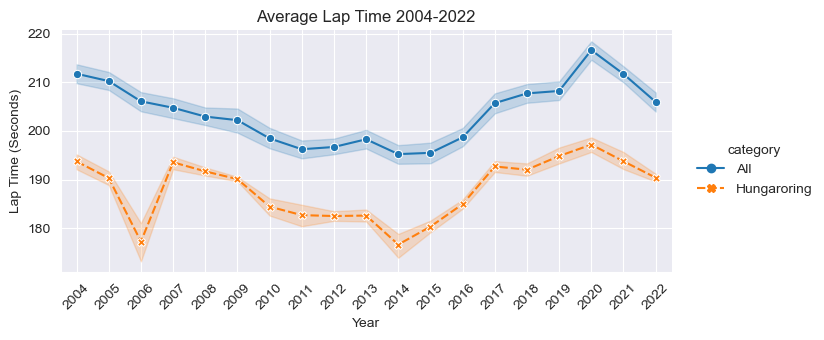

In [309]:
# line plots overlayed all with silverstone
fig = sns.relplot(data=df_hungaroring, x='year', y='fastestLapSpeed', kind='line', hue='category', height=3.5, aspect=2, markers=True, style='category')
fig.set_axis_labels('Year', 'Lap Time (Seconds)')
fig.set(title='Average Lap Time 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
# fig.savefig
plt.show()

## Bahrain

In [310]:
# create subset data frame with bahrain data
df_bahrain = df.loc[df.circuitRef=='bahrain']
# populate category column with 'bahrain'
df_bahrain.loc[df.circuitRef=='bahrain', 'category'] = 'bahrain'

# concat with full dataframe
df_bahrain = pd.concat([df,df_bahrain], ignore_index=True)
df_bahrain

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,con_name,con_nationality,driverRef,code,forename,surname,dob,driver_nationality,year,round,circuitId,race_name,date,status,circuitRef,circuit_name,location,country,lat,lng,alt,fastestLap_seconds,category
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,00:01:27.452000,218.300,1,mclaren,McLaren,British,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.452,All
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,00:01:27.418000,218.385,1,mclaren,McLaren,British,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.418,All
2,4,18,4,4,11,4,4,4,5.0,58,5707797,58,7,00:01:28.603000,215.464,1,renault,Renault,French,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,88.603,All
3,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,00:01:27.739000,217.586,1,bmw_sauber,BMW Sauber,German,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.739,All
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,00:01:28.090000,216.719,1,williams,Williams,British,rosberg,ROS,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,88.090,All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7693,24241,1011,832,1,7,None,R,19,0.0,53,None,42,10,00:01:35.586000,203.829,130,mclaren,McLaren,British,sainz,SAI,Carlos,Sainz,1994-09-01,Spanish,2019,2,3,Bahrain Grand Prix,2019-03-31,Collision damage,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.5106,7,95.586,bahrain
7694,1572,92,14,1,10,None,R,18,0.0,50,None,19,9,00:01:31.861000,212.290,63,mclaren,McLaren,British,coulthard,COU,David,Coulthard,1971-03-27,British,2004,3,3,Bahrain Grand Prix,2004-04-04,Pneumatics,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.5106,7,91.861,bahrain
7695,22958,949,18,1,14,None,R,20,0.0,6,None,3,20,00:01:39.427000,195.954,131,mclaren,McLaren,British,button,BUT,Jenson,Button,1980-01-19,British,2016,2,3,Bahrain Grand Prix,2016-04-03,Power Unit,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.5106,7,99.427,bahrain
7696,23432,971,4,1,15,14,14,14,0.0,54,None,47,14,00:01:35.595000,203.809,131,mclaren,McLaren,British,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2017,3,3,Bahrain Grand Prix,2017-04-16,Power Unit,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.0325,50.5106,7,95.595,bahrain


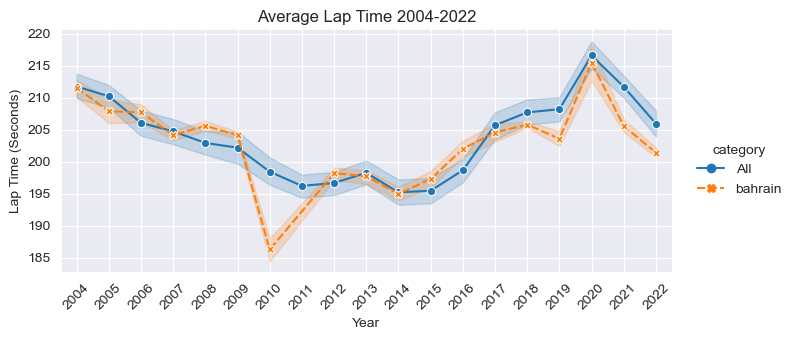

In [311]:
# line plots overlayed all with bahrain
fig = sns.relplot(data=df_bahrain, x='year', y='fastestLapSpeed', kind='line', hue='category', height=3.5, aspect=2, markers=True, style='category')
fig.set_axis_labels('Year', 'Lap Time (Seconds)')
fig.set(title='Average Lap Time 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
# fig.savefig
plt.show()

## Catalunya

In [312]:
# create subset data frame with catalunya data
df_catalunya = df.loc[df.circuitRef=='catalunya']
# populate category column with 'catalunya'
df_catalunya.loc[df.circuitRef=='catalunya', 'category'] = 'catalunya'

# concat with full dataframe
df_catalunya = pd.concat([df,df_catalunya], ignore_index=True)
df_catalunya

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,con_name,con_nationality,driverRef,code,forename,surname,dob,driver_nationality,year,round,circuitId,race_name,date,status,circuitRef,circuit_name,location,country,lat,lng,alt,fastestLap_seconds,category
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,00:01:27.452000,218.300,1,mclaren,McLaren,British,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.452,All
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,00:01:27.418000,218.385,1,mclaren,McLaren,British,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.418,All
2,4,18,4,4,11,4,4,4,5.0,58,5707797,58,7,00:01:28.603000,215.464,1,renault,Renault,French,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.603,All
3,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,00:01:27.739000,217.586,1,bmw_sauber,BMW Sauber,German,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.739,All
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,00:01:28.090000,216.719,1,williams,Williams,British,rosberg,ROS,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.090,All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696,23878,993,8,6,4,None,R,17,0.0,25,None,23,11,00:01:21.531000,205.541,101,ferrari,Ferrari,Italian,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish,2018,5,4,Spanish Grand Prix,2018-05-13,Turbo,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,81.531,catalunya
7697,25525,1079,844,6,1,None,R,20,0.0,27,None,25,13,00:01:27.030000,193.381,101,ferrari,Ferrari,Italian,leclerc,LEC,Charles,Leclerc,1997-10-16,Monegasque,2022,6,4,Spanish Grand Prix,2022-05-22,Turbo,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,87.030,catalunya
7698,25524,1079,855,51,15,None,R,19,0.0,28,None,12,20,00:01:28.415000,190.352,75,alfa,Alfa Romeo,Swiss,zhou,ZHO,Guanyu,Zhou,1999-05-30,Chinese,2022,6,4,Spanish Grand Prix,2022-05-22,Power loss,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,88.415,catalunya
7699,870,58,27,13,18,None,R,18,0.0,48,None,28,20,00:01:19.532000,209.440,41,mf1,MF1,Russian,albers,ALB,Christijan,Albers,1979-04-16,Dutch,2006,6,4,Spanish Grand Prix,2006-05-14,Broken wing,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.5700,2.26111,109,79.532,catalunya


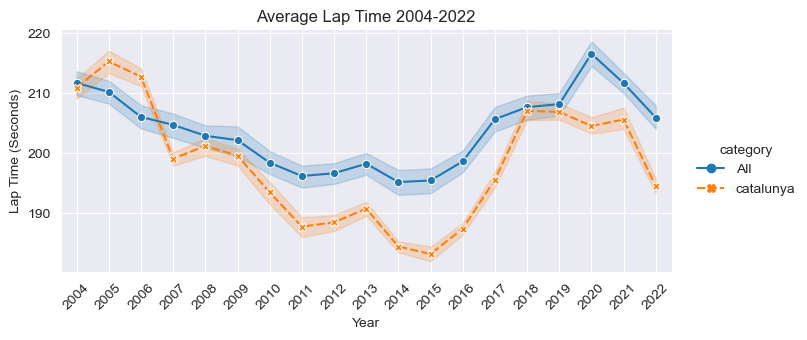

In [313]:
# line plots overlayed all with catalunya
fig = sns.relplot(data=df_catalunya, x='year', y='fastestLapSpeed', kind='line', hue='category', height=3.5, aspect=2, markers=True, style='category')
fig.set_axis_labels('Year', 'Lap Time (Seconds)')
fig.set(title='Average Lap Time 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
# fig.savefig
plt.show()

## Monza

In [314]:
# create subset data frame with monza data
df_monza = df.loc[df.circuitRef=='monza']
# populate category column with 'monza'
df_monza.loc[df.circuitRef=='monza', 'category'] = 'monza'

# concat with full dataframe
df_monza = pd.concat([df,df_monza], ignore_index=True)
df_monza

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,con_name,con_nationality,driverRef,code,forename,surname,dob,driver_nationality,year,round,circuitId,race_name,date,status,circuitRef,circuit_name,location,country,lat,lng,alt,fastestLap_seconds,category
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,00:01:27.452000,218.300,1,mclaren,McLaren,British,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.452,All
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,00:01:27.418000,218.385,1,mclaren,McLaren,British,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.418,All
2,4,18,4,4,11,4,4,4,5.0,58,5707797,58,7,00:01:28.603000,215.464,1,renault,Renault,French,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.603,All
3,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,00:01:27.739000,217.586,1,bmw_sauber,BMW Sauber,German,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.739,All
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,00:01:28.090000,216.719,1,williams,Williams,British,rosberg,ROS,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.090,All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697,24784,1038,825,210,15,None,R,19,0.0,17,None,10,18,00:01:25.787000,243.099,131,haas,Haas F1 Team,American,kevin_magnussen,MAG,Kevin,Magnussen,1992-10-05,Danish,2020,8,14,Italian Grand Prix,2020-09-06,Power Unit,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,85.787,monza
7698,24782,1038,830,9,5,None,R,17,0.0,30,None,10,17,00:01:25.539000,243.804,131,red_bull,Red Bull,Austrian,max_verstappen,VER,Max,Verstappen,1997-09-30,Dutch,2020,8,14,Italian Grand Prix,2020-09-06,Power Unit,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,85.539,monza
7699,25241,1065,853,210,16,None,R,16,0.0,41,None,41,18,00:01:27.202000,239.155,131,haas,Haas F1 Team,American,mazepin,MAZ,Nikita,Mazepin,1999-03-02,Russian,2021,14,14,Italian Grand Prix,2021-09-12,Power Unit,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,87.202,monza
7700,23221,961,826,5,16,None,R,19,0.0,36,None,35,17,00:01:28.037000,236.886,84,toro_rosso,Toro Rosso,Italian,kvyat,KVY,Daniil,Kvyat,1994-04-26,Russian,2016,14,14,Italian Grand Prix,2016-09-04,Battery,monza,Autodromo Nazionale di Monza,Monza,Italy,45.6156,9.28111,162,88.037,monza


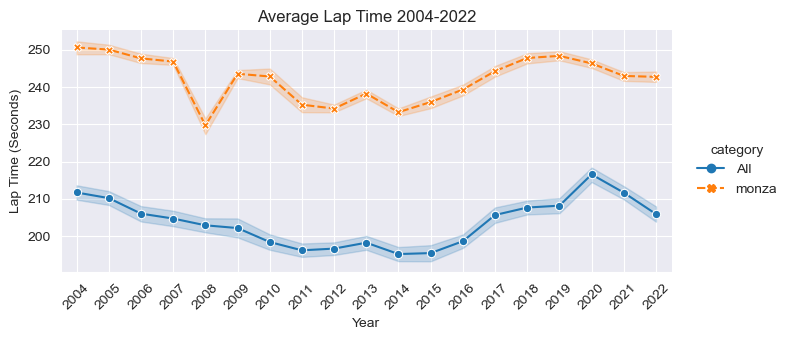

In [315]:
# line plots overlayed all with monza
fig = sns.relplot(data=df_monza, x='year', y='fastestLapSpeed', kind='line', hue='category', height=3.5, aspect=2, markers=True, style='category')
fig.set_axis_labels('Year', 'Lap Time (Seconds)')
fig.set(title='Average Lap Time 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
# fig.savefig
plt.show()

## Monaco

In [316]:
# create subset data frame with monaco data
df_monaco = df.loc[df.circuitRef=='monaco']
# populate category column with 'monaco'
df_monaco.loc[df.circuitRef=='monaco', 'category'] = 'monaco'

# concat with full dataframe
df_monaco = pd.concat([df,df_monaco], ignore_index=True)
df_monaco

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,con_name,con_nationality,driverRef,code,forename,surname,dob,driver_nationality,year,round,circuitId,race_name,date,status,circuitRef,circuit_name,location,country,lat,lng,alt,fastestLap_seconds,category
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,00:01:27.452000,218.300,1,mclaren,McLaren,British,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.452,All
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,00:01:27.418000,218.385,1,mclaren,McLaren,British,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.418,All
2,4,18,4,4,11,4,4,4,5.0,58,5707797,58,7,00:01:28.603000,215.464,1,renault,Renault,French,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.603,All
3,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,00:01:27.739000,217.586,1,bmw_sauber,BMW Sauber,German,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,87.739,All
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,00:01:28.090000,216.719,1,williams,Williams,British,rosberg,ROS,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,88.090,All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,25064,1056,822,131,3,None,R,19,0.0,29,None,18,17,00:01:15.706000,158.682,61,mercedes,Mercedes,German,bottas,BOT,Valtteri,Bottas,1989-08-28,Finnish,2021,5,6,Monaco Grand Prix,2021-05-23,Wheel nut,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,75.706,monaco
7671,894,59,8,1,3,None,R,20,0.0,50,None,19,2,00:01:15.325000,159.628,42,mclaren,McLaren,British,raikkonen,RAI,Kimi,Räikkönen,1979-10-17,Finnish,2006,7,6,Monaco Grand Prix,2006-05-28,Heat shield fire,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,75.325,monaco
7672,23496,974,18,1,20,None,R,18,0.0,57,None,47,17,00:01:16.912000,156.194,130,mclaren,McLaren,British,button,BUT,Jenson,Button,1980-01-19,British,2017,6,6,Monaco Grand Prix,2017-05-28,Collision damage,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,76.912,monaco
7673,23492,974,826,5,9,14,14,14,0.0,71,None,43,11,00:01:16.539000,156.955,130,toro_rosso,Toro Rosso,Italian,kvyat,KVY,Daniil,Kvyat,1994-04-26,Russian,2017,6,6,Monaco Grand Prix,2017-05-28,Collision damage,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.7347,7.42056,7,76.539,monaco


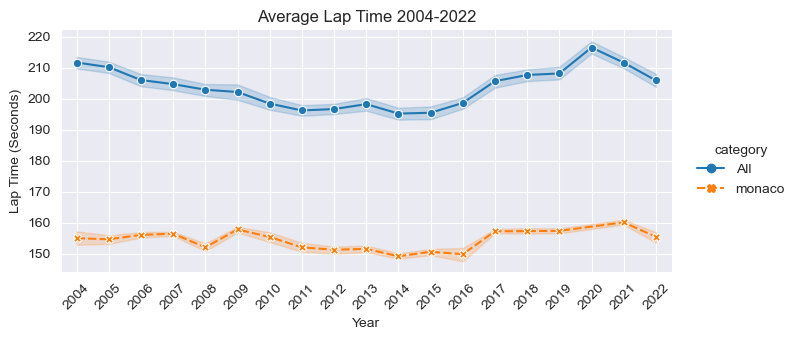

In [317]:
# line plots overlayed all with monaco
fig = sns.relplot(data=df_monaco, x='year', y='fastestLapSpeed', kind='line', hue='category', height=3.5, aspect=2, markers=True, style='category')
fig.set_axis_labels('Year', 'Lap Time (Seconds)')
fig.set(title='Average Lap Time 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
# fig.savefig
plt.show()

## Interlagos

In [318]:
# create subset data frame with interlagos data
df_interlagos = df.loc[df.circuitRef=='interlagos']
# populate category column with 'interlagos'
df_interlagos.loc[df.circuitRef=='interlagos', 'category'] = 'interlagos'

# concat with full dataframe
df_interlagos = pd.concat([df,df_interlagos], ignore_index=True)
df_interlagos

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,con_name,con_nationality,driverRef,code,forename,surname,dob,driver_nationality,year,round,circuitId,race_name,date,status,circuitRef,circuit_name,location,country,lat,lng,alt,fastestLap_seconds,category
0,1,18,1,1,1,1,1,1,10.0,58,5690616,39,2,00:01:27.452000,218.300,1,mclaren,McLaren,British,hamilton,HAM,Lewis,Hamilton,1985-01-07,British,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.452,All
1,5,18,5,1,3,5,5,5,4.0,58,5708630,43,1,00:01:27.418000,218.385,1,mclaren,McLaren,British,kovalainen,KOV,Heikki,Kovalainen,1981-10-19,Finnish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.418,All
2,4,18,4,4,11,4,4,4,5.0,58,5707797,58,7,00:01:28.603000,215.464,1,renault,Renault,French,alonso,ALO,Fernando,Alonso,1981-07-29,Spanish,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,88.603,All
3,2,18,2,2,5,2,2,2,8.0,58,5696094,41,3,00:01:27.739000,217.586,1,bmw_sauber,BMW Sauber,German,heidfeld,HEI,Nick,Heidfeld,1977-05-10,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,87.739,All
4,3,18,3,3,7,3,3,3,6.0,58,5698779,41,5,00:01:28.090000,216.719,1,williams,Williams,British,rosberg,ROS,Nico,Rosberg,1985-06-27,German,2008,1,1,Australian Grand Prix,2008-03-16,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,88.090,All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,22516,917,154,208,14,17,17,17,0.0,63,None,63,6,00:01:14.070000,209.428,18,lotus_f1,Lotus F1,British,grosjean,GRO,Romain,Grosjean,1986-04-17,French,2014,18,18,Brazilian Grand Prix,2014-11-09,+8 Laps,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.6997,785,74.070,interlagos
7665,24605,1029,822,131,4,None,R,20,0.0,51,None,43,1,00:01:10.698000,219.417,131,mercedes,Mercedes,German,bottas,BOT,Valtteri,Bottas,1989-08-28,Finnish,2019,20,18,Brazilian Grand Prix,2019-11-17,Power Unit,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.6997,785,70.698,interlagos
7666,25344,1071,817,1,11,None,R,19,0.0,49,None,40,17,00:01:14.443000,208.379,75,mclaren,McLaren,British,ricciardo,RIC,Daniel,Ricciardo,1989-07-01,Australian,2021,19,18,São Paulo Grand Prix,2021-11-14,Power loss,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.6997,785,74.443,interlagos
7667,22896,944,13,3,8,None,E,20,0.0,70,None,57,6,00:01:15.743000,204.803,96,williams,Williams,British,massa,MAS,Felipe,Massa,1981-04-25,Brazilian,2015,18,18,Brazilian Grand Prix,2015-11-15,Excluded,interlagos,Autódromo José Carlos Pace,São Paulo,Brazil,-23.7036,-46.6997,785,75.743,interlagos


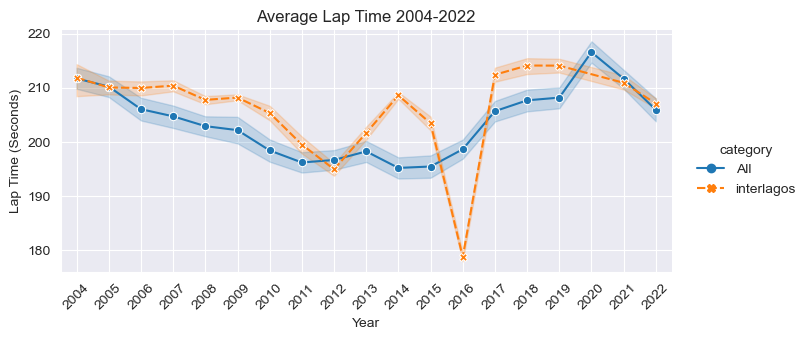

In [319]:
# line plots overlayed all with interlagos
fig = sns.relplot(data=df_interlagos, x='year', y='fastestLapSpeed', kind='line', hue='category', height=3.5, aspect=2, markers=True, style='category')
fig.set_axis_labels('Year', 'Lap Time (Seconds)')
fig.set(title='Average Lap Time 2004-2022', xticks=range(2004,2023))
fig.set_xticklabels(range(2004,2023), rotation=45)
fig.ax.set_xlim(2003.5,2022.5)
fig.tight_layout()
# fig.savefig
plt.show()

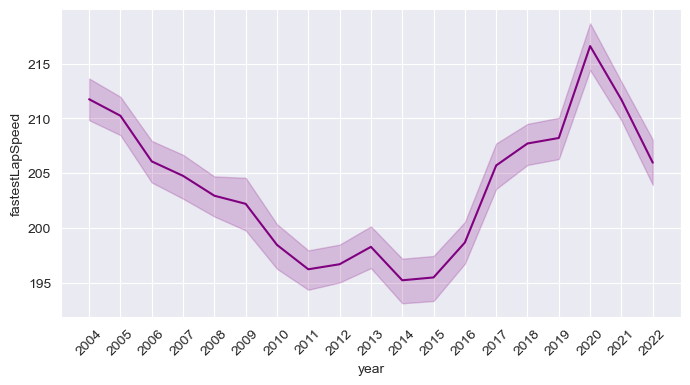

In [320]:
# line plots with fastest lap speed
plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='year', y='fastestLapSpeed', color='purple')
plt.xticks(ticks=range(2004,2023), rotation=45)
plt.show()

### 2005 -> 2006: V8 engine instead of V10

In [321]:
df.groupby(['year', 'circuitId'])['fastestLap_seconds'].nsmallest(n=1).reset_index()

,year,circuitId,level_2,fastestLap_seconds
0,2004,1,155,84.125
1,2004,2,666,94.223
2,2004,3,1140,90.252
3,2004,4,1483,77.450
4,2004,6,2696,74.439
...,...,...,...,...
356,2022,69,16107,98.788
357,2022,70,16293,67.275
358,2022,73,17824,106.046
359,2022,77,19948,91.634


In [322]:
# find races that happened in both 2005 and 2006 
df0809 = df.loc[(df['year'] == 2008) | (df['year'] == 2009)]

In [323]:
temp = df.groupby(['circuitRef', 'year'])['fastestLap_seconds'].nsmallest(n=1).reset_index()

In [324]:
sns.lineplot(data = temp, x = 'year', y = 'fastestLap_seconds')

<AxesSubplot:xlabel='year', ylabel='fastestLap_seconds'>

In [325]:
temp.groupby('year', as_index = False)['fastestLap_seconds'].mean()

,year,fastestLap_seconds
0,2004,82.441722
1,2005,83.702105
2,2006,83.435889
3,2007,85.257765
4,2008,87.386778
5,2009,91.678059
6,2010,92.595368
7,2011,92.552105
8,2012,93.185950
9,2013,92.616158


In [326]:
temp2 = df.groupby('year')['fastestLap_seconds'].mean().reset_index()
temp2['change'] = temp2[['fastestLap_seconds']].diff()
temp2

,year,fastestLap_seconds,change
0,2004,84.394271,NaN
1,2005,86.392192,1.997921
2,2006,85.840019,-0.552173
3,2007,87.228096,1.388077
4,2008,89.035936,1.807840
5,2009,93.004354,3.968418
6,2010,95.420236,2.415882
7,2011,95.669039,0.248803
8,2012,95.152693,-0.516346
9,2013,94.708056,-0.444637


In [327]:
df.groupby(['circuitId', 'year'], as_index=False).size().sort_values(by='size')

,circuitId,year,size
255,19,2005,6
256,19,2006,12
11,1,2015,13
162,11,2021,14
280,22,2014,14
...,...,...,...
38,3,2012,24
46,3,2020,36
338,70,2021,38
337,70,2020,38


Find the most used circuits

In [328]:
# get list of n circuits with the most samples
n = 7

race_list = df.groupby('circuitId').size().nlargest(n=n).index.to_list()

# subset data for just the circuits in the most used circuits list
df_sample = df.loc[df['circuitId'].isin(race_list)]

In [329]:
# plot lap time distribution across entire dataset
sns.histplot(df_sample, x='fastestLap_seconds', stat='density')

<AxesSubplot:xlabel='year', ylabel='fastestLap_seconds'>

In [330]:
# plot lap time distribution from each circuit
sns.boxplot(data = df_sample, x = 'fastestLap_seconds', y = 'circuitRef', orient = 'h')

<AxesSubplot:xlabel='fastestLap_seconds', ylabel='circuitRef'>

In [331]:
# remove outliers from each circuit
# df_sample = df_sample[~df_sample.groupby('circuitId')['fastestLap_seconds'].apply(is_outlier)]

### KEEP THIS CODE SAMPLE^^

In [332]:
# plot average lap time over year, grouped by circuit
fig4 = sns.lineplot(data = df_sample, x = 'year', y='fastestLap_seconds', hue='name_ci', style='name_ci', markers=True, dashes=False)
fig4.set_xticks(range(2004,2023,2))
plt.show()

ValueError: Could not interpret value `name_ci` for parameter `hue`

In [ ]:
fig5 =

In [ ]:
# move to appendix
fig, ax = plt.subplots(2,1, gridspec_kw={'height_ratios':[2,1]})
# fig.subplots_adjust(hspace=0)
ax[0].set_xticks(range(2004,2023), labels=range(2004,2023), rotation=45)
ax[1].set_xticks(range(2004,2023), labels=range(2004,2023), rotation=45)
ax[0].set_xlim(2003.5,2022.5)
ax[1].set_yticks(range(-4,5,2))
# bars=ax[1].bar(df_diff.year, df_diff.change)
# ax[1].bar_label(bars, labels = df_diff.change)
sns.lineplot(data=df, x='year', y='fastestLap_seconds', ax=ax[0])
splot = sns.barplot(data=df_diff, x ='year', y = 'change', ax=ax[1])
print(type(splot))
ax[1].bar_label(splot.containers[0])
fig.tight_layout()
fig.savefig('yup.png')
plt.show()

In [ ]:
df.groupby(['raceId', 'race_name', 'year'], as_index=False)['fastestLap_seconds'].std().sort_values(by='fastestLap_seconds', ascending=False).head(10)